In [1]:
#the module 'sys' allows istalling module from inside Jupyter
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install pandas
import pandas as pd

#Natrual Language ToolKit (NLTK)
!{sys.executable} -m pip install nltk
import nltk

!{sys.executable} -m pip install sklearn
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# Plotting tools

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.sklearn

import matplotlib.pyplot as plt
%matplotlib inline

#ignore warnings about future changes in functions as they take too much space
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

#define text normalization function
%run ./Text_Normalization_Function.ipynb #defining text normalization function

ERROR: Invalid requirement: '#visualizing'


Processing c:\users\fefe\appdata\local\pip\cache\wheels\4f\85\2a\67a30aa6cf144eca0c159f337ce5166df2213c4cde9e699cbe\html_parser-0.2-py3-none-any.whl
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fefe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fefe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fefe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fefe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), ('<', 'n'), ('/p', 'n'), ('>', 'n')]
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > the circus dog in a plissé skirt jump over python who be n't that large , just 3 foot long. < /p >
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:    p   The circus dog in a plissé skirt jumped over Python who was n t that large   just 3 feet long     p  
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > The circus dog pliss

In [36]:
data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

Extract data from three largest cell phone manufacturers

In [38]:
Samsung = data[data["Brand Name"] == "Samsung"]
Apple = data[data["Brand Name"] == "Apple"]
Huawei = data[data["Brand Name"] == "Huawei"]

Sample 20% of the first two brands and all of third brand as research object

In [39]:
Samsung = Samsung.sample(frac = 0.2, random_state = 10)
Apple = Apple.sample(frac = 0.2, random_state = 10)
# Huawei has only 3325 rows of data which does not need to further split.
print(Samsung.shape)
print(Apple.shape)
print(Huawei.shape)

(13149, 6)
(11637, 6)
(3325, 6)


Preprocess The three dataframes, steps including: 1) drop NAs, 2) filter rating 3, 3)Create polarity column

In [99]:
Samsung.dropna(inplace=True)

Samsung = Samsung[Samsung["Rating"] !=3]

Samsung["polarity"] = np.where(Samsung["Rating"] >3, "positive", "negative")

<ipython-input-99-f5230de3da82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Samsung["polarity"] = np.where(Samsung["Rating"] >3, "positive", "negative")


In [98]:
Apple.dropna(inplace=True)

Apple = Apple[Apple["Rating"] !=3]

Apple["polarity"] = np.where(Apple["Rating"] >3, "positive", "negative")

<ipython-input-98-81450ce20388>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Apple["polarity"] = np.where(Apple["Rating"] >3, "positive", "negative")


In [100]:
Huawei.dropna(inplace=True)

Huawei = Huawei[Huawei["Rating"] !=3]

Huawei["polarity"] = np.where(Huawei["Rating"] >3, "positive", "negative")

<ipython-input-100-d8cd8fd20975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Huawei.dropna(inplace=True)
<ipython-input-100-d8cd8fd20975>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Huawei["polarity"] = np.where(Huawei["Rating"] >3, "positive", "negative")


Split each of the three dataframes into test and train datasets for later on supervised machine learning sentiment analysis 

In [101]:
from sklearn.model_selection import train_test_split

Samsung_Review = Samsung["Reviews"]
Samsung_Polarity = Samsung["polarity"]

Samsung_Review_train,Samsung_Review_test,Samsung_Polarity_train,Samsung_Polarity_test \
= train_test_split(Samsung_Review,Samsung_Polarity, random_state=0)

In [103]:
Apple_Review = Apple["Reviews"]
Apple_Polarity = Apple["polarity"]

Apple_Review_train, Apple_Review_test, Apple_Polarity_train, Apple_Polarity_test \
= train_test_split(Apple_Review,Apple_Polarity, random_state=0)

In [104]:
Huawei_Review = Huawei["Reviews"]
Huawei_Polarity = Huawei["polarity"]

Huawei_Review_train, Huawei_Review_test, Huawei_Polarity_train, Huawei_Polarity_test \
= train_test_split(Huawei_Review,Huawei_Polarity, random_state=0)

Make the resulting test train data into NumPy arrays, resulting in 2 review arrays and 2 polarity arrays for each of the three brands

In [105]:
Samsung_train_review = np.array(Samsung_Review_train)
Samsung_train_polarity = np.array(Samsung_Polarity_train)

Samsung_test_review = np.array(Samsung_Review_test)
Samsung_test_polarity = np.array(Samsung_Polarity_test)

In [106]:
normalized_Samsung_test_reviews = normalize_corpus(Samsung_test_review)
normalized_Samsung_train_reviews = normalize_corpus(Samsung_Review_train)

In [107]:
Apple_train_review = np.array(Apple_Review_train)
Apple_train_polarity = np.array(Apple_Polarity_train)

Apple_test_review = np.array(Apple_Review_test)
Apple_test_polarity = np.array(Apple_Polarity_test)

In [108]:
normalized_Apple_test_reviews = normalize_corpus(Apple_test_review)
normalized_Apple_train_reviews = normalize_corpus(Apple_Review_train)

In [109]:
Huawei_train_review = np.array(Huawei_Review_train)
Huawei_train_polarity = np.array(Huawei_Polarity_train)

Huawei_test_review = np.array(Huawei_Review_test)
Huawei_test_polarity = np.array(Huawei_Polarity_test)

In [110]:
normalized_Huawei_test_reviews = normalize_corpus(Huawei_test_review)
normalized_Huawei_train_reviews = normalize_corpus(Huawei_Review_train)

Lexicon-Based Sentiment Analysis (Unsupervised Machine learning)

In [111]:
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\fefe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [112]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Develop function to score review texts using VADER lexicon and output the actual and socred sentiment

In [113]:
def analyze_sentiment_vader_lexicon(review, threshold = 0.1, verbose = False):
    scores = analyzer.polarity_scores(review)
    binary_sentiment = 'positive' if scores['compound'] >= threshold else 'negative'
    if verbose:
        print('VADER Polarity (Binary):', binary_sentiment)
        print("VADER Score:", round(scores["compound"],2))
    return binary_sentiment,scores["compound"]

Apply the function on each of the three test datasets

In [117]:
VADER_polarity_Samsung_test = [analyze_sentiment_vader_lexicon(review, threshold = 0.1) for review in Samsung_test_review]
VADER_polarity_Samsung_test_df = pd.DataFrame(VADER_polarity_Samsung_test, columns = ["VADER Polarity", "VADER Score"])
VADER_polarity_Samsung_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.5023
1,negative,0.0000
2,positive,0.8846
3,positive,0.7951
4,positive,0.6530


Calculate the accuracy rate of the VADER lexicon result against the acutal label

In [115]:
from sklearn import metrics
print('Accuracy Rate:', np.round(metrics.accuracy_score(Samsung_test_polarity, 
                                 VADER_polarity_Samsung_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.818 



Form a confusion matrix to calculate the precision and the recall for the VADER lexicon on review text

In [116]:
pd.crosstab(pd.Series(Samsung_test_polarity), 
            pd.Series(VADER_polarity_Samsung_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,493,155,648
positive,384,1928,2312
All,877,2083,2960


Samsung Precision = 1928 / (1928 + 155) = 0.9255 \
Samsung Recall = 1928 / (1928 + 384) = 0.8339

In [118]:
VADER_polarity_Apple_test = [analyze_sentiment_vader_lexicon(review, threshold = 0.1) for review in Apple_test_review]
VADER_polarity_Apple_test_df = pd.DataFrame(VADER_polarity_Apple_test, columns = ["VADER Polarity", "VADER Score"])
VADER_polarity_Apple_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.8360
1,positive,0.6369
2,negative,-0.7506
3,positive,0.1162
4,positive,0.7717


In [119]:
print('Accuracy Rate:', np.round(metrics.accuracy_score(Apple_test_polarity, 
                                 VADER_polarity_Apple_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.832 



In [120]:
pd.crosstab(pd.Series(Apple_test_polarity), 
            pd.Series(VADER_polarity_Apple_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,533,136,669
positive,313,1688,2001
All,846,1824,2670


Apple Precision = 1688 / (1688 + 136) = 0.9254 \
Apple Recall = 1688 / (1688 + 313) = 0.8436

In [121]:
VADER_polarity_Huawei_test = [analyze_sentiment_vader_lexicon(review, threshold = 0.1) for review in Huawei_test_review]
VADER_polarity_Huawei_test_df = pd.DataFrame(VADER_polarity_Huawei_test, columns = ["VADER Polarity", "VADER Score"])
VADER_polarity_Huawei_test_df.head()

,VADER Polarity,VADER Score
0,positive,0.6696
1,positive,0.7906
2,negative,-0.2121
3,negative,0.0000
4,negative,-0.6908


In [140]:
print('Accuracy Rate:', np.round(metrics.accuracy_score(Huawei_test_polarity, 
                                 VADER_polarity_Huawei_test_df['VADER Polarity']), 3),"\n")

Accuracy Rate: 0.834 



In [123]:
pd.crosstab(pd.Series(Huawei_test_polarity), 
            pd.Series(VADER_polarity_Huawei_test_df['VADER Polarity']), 
            rownames = ['True:'], 
            colnames = ['Predicted:'], 
            margins = True)

Predicted:,negative,positive,All
True:,,,
negative,69,25,94
positive,100,560,660
All,169,585,754


Huawei Precision = 560 / (560 + 25) = 0.9573 \
Huawei Recall = 560 / (560 + 100) = 0.8485

Define a new function that output the accuracy of VADER lexicon under different threshold values

In [145]:
def try_threshold_for_accuracy_Samsung(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(Samsung_test_polarity, VADER_binary_polarity)
    return(accuracy) 

Apply the above function on each of the three brands and on 1000 different threshold values. Then plot the resulting accuracy rate against the threshold score to find out the optimal threshold value of each of the three brands.

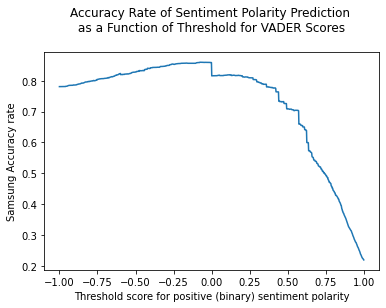

In [179]:
thresholds = np.linspace(-1,1,1000)
Samsung_acc_rates = [try_threshold_for_accuracy_Samsung(VADER_polarity_Samsung_test_df['VADER Score'], threshold) for threshold in thresholds]

plt.plot(thresholds, Samsung_acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Samsung Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

Find out the optimal threshold value for each brand 

In [149]:
thresholds[Samsung_acc_rates.index(max(Samsung_acc_rates))]

-0.07707707707707712

Find out the maximum accuracy rate under the optimal threshold value

In [150]:
max(Samsung_acc_rates)

0.8601351351351352

In [151]:
def try_threshold_for_accuracy_Apple(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(Apple_test_polarity, VADER_binary_polarity)
    return(accuracy) 

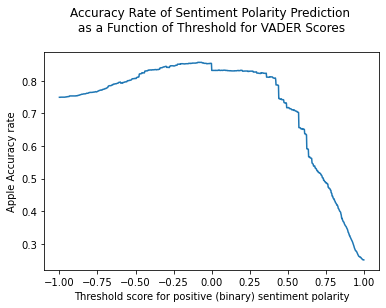

In [180]:
Apple_acc_rates = [try_threshold_for_accuracy_Apple(VADER_polarity_Apple_test_df['VADER Score'], threshold) for threshold in thresholds]

plt.plot(thresholds, Apple_acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Apple Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

In [153]:
thresholds[Apple_acc_rates.index(max(Apple_acc_rates))]

-0.08908908908908908

In [154]:
max(Apple_acc_rates)

0.8569288389513109

In [155]:
def try_threshold_for_accuracy_Huawei(sentiment_scores, threshold_for_pos):
    VADER_binary_polarity = ['positive' if s >= threshold_for_pos else 'negative' for s in list(sentiment_scores)]
    accuracy = metrics.accuracy_score(Huawei_test_polarity, VADER_binary_polarity)
    return(accuracy) 

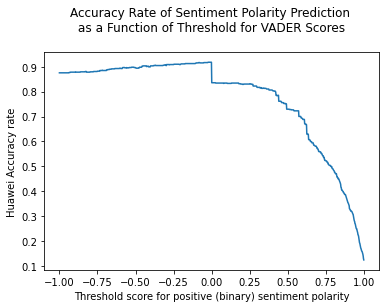

In [181]:
Huawei_acc_rates = [try_threshold_for_accuracy_Huawei(VADER_polarity_Huawei_test_df['VADER Score'], threshold) for threshold in thresholds]

plt.plot(thresholds, Huawei_acc_rates)
plt.xlabel("Threshold score for positive (binary) sentiment polarity")
plt.ylabel("Huawei Accuracy rate")
plt.title("Accuracy Rate of Sentiment Polarity Prediction \n as a Function of Threshold for VADER Scores \n")
plt.show()

In [158]:
thresholds[Huawei_acc_rates.index(max(Huawei_acc_rates))]

-0.02302302302302306

In [159]:
max(Huawei_acc_rates)

0.9177718832891246

Interestingly, For all three brands, the threshold value that result in the highest model accuracy happens to be slightly below 0 (negative). This might imply that VADER, tends to report that a review is negative when in fact it is positive. Therefore, we need to be less strict with what we want to define as a positive review (from 0.1 to slightly negative in this case) In other words, we just need to see a few features in the text being rated by VADER as positive before we want to conclude that the review is actually positive.

The recall is defined as Recall = true positives / (true positives + false negatives). Here, we can minimize the number of false negatives if we'd like to increase the recall rate. To minimize the number of false negatives we can set the VADER compound score threshold to be close to -1.